## **<div style="text-align:center;color:red;">BAYKAR TEKNOLOJİSİ - YAPAY ZEKA ANALİZİ</div>**
## **<div style="text-align:center;color:blue;">BREAST CANCER WISCONSIN (Diagnostic) VERİ SETİ İLE SINIFLANDRIMA</div>**

#### **<span style="color:red;">Projenin Amacı: </span>** 
Wisconsin Meme Kanseri veri setini kullanarak:  
1- Veri analizi ve görselleştirme teknikleriyle örüntüleri keşfetmek  
2- Makine öğrenmesi modelleri (Lojistik Regresyon, Random Forest, SVM, vb.) ve derin öğrenme (Yapay Sinir Ağı) ile sınıflandırma yapmak  
3- Modellerin performanslarını karşılaştırarak en iyi teşhis sistemini geliştirmek  
4- Streamlit ile kullanıcı dostu bir web arayüzü oluşturarak:
- Doktorların hasta verilerini girebileceği
- Anında teşhis tahmini alabileceği
- Veri analizi sonuçlarını görebileceği interaktif bir tıbbi karar destek sistemi sunmak

Özetle kanser teşhisini otomatikleştiren, doğru ve kullanımı kolay bir yapay zeka uygulaması geliştirmek.
#### **<span style="color:orange;">Hazırlayan: </span>** İpek Zorpineci

### **<span style="color:#ff69b4;">1.VERİ ANALİZİ</span>**  
Bu aşama, ham veri setinin yapısını, içeriğini, özelliklerini ve potansiyel sorunlarını (eksik değerler, aykırı değerler vb.) anlamak için kritik bir adımdır. Veri setindeki örüntüleri, ilişkileri ve dağılımları keşfederek, sonraki veri ön işleme ve modelleme adımları için temel bir anlayış oluşturulur. Özellikle iyi huylu (Benign) ve kötü huylu (Malignant) tümör özellikleri arasındaki farkları görselleştirmek ve bu farkların teşhis üzerindeki etkisini anlamak için hedeflenmiştir.

#### <span style="color:#32cd32;">1.1. Veri Setini Yükleme ve İlk İnceleme<span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükleme (data.csv kullanarak)
df = pd.read_csv('data.csv')

# İlk 5 gözlemi görüntüleme
print("İlk 5 gözlem:\n")
print(df.head())

İlk 5 gözlem:

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_wo

In [2]:
# Temel bilgiler
print("\nVeri seti bilgileri:\n")
print(df.info())


Veri seti bilgileri:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  per

In [3]:
print("\nTemel istatistikler:\n")
print(df.describe())


Temel istatistikler:

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064

#### <span style="color:#32cd32;">1.2. Eksik Veri Analizi<span>


Eksik veri sayısı:

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_

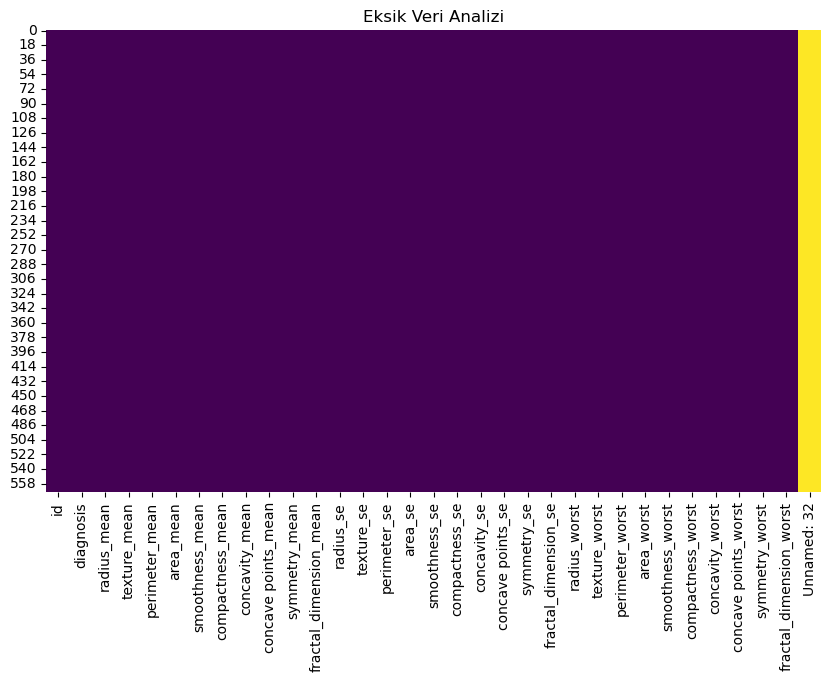

In [4]:
# Eksik veri kontrolü
print("\nEksik veri sayısı:\n")
print(df.isnull().sum())

# Eksik veri görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Eksik Veri Analizi')
plt.show()

#### <span style="color:#32cd32;">1.3. Hedef Değişken Dağılımı<span>

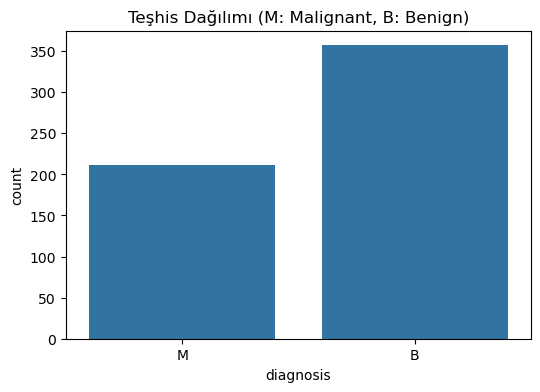


Teşhis oranları (yüzde):
diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


In [5]:
# Hedef değişken dağılımı
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=df)
plt.title('Teşhis Dağılımı (M: Malignant, B: Benign)')
plt.show()

print("\nTeşhis oranları (yüzde):")
print(df['diagnosis'].value_counts(normalize=True))

#### <span style="color:#32cd32;">1.4. Özelliklerin Dağılımı<span>

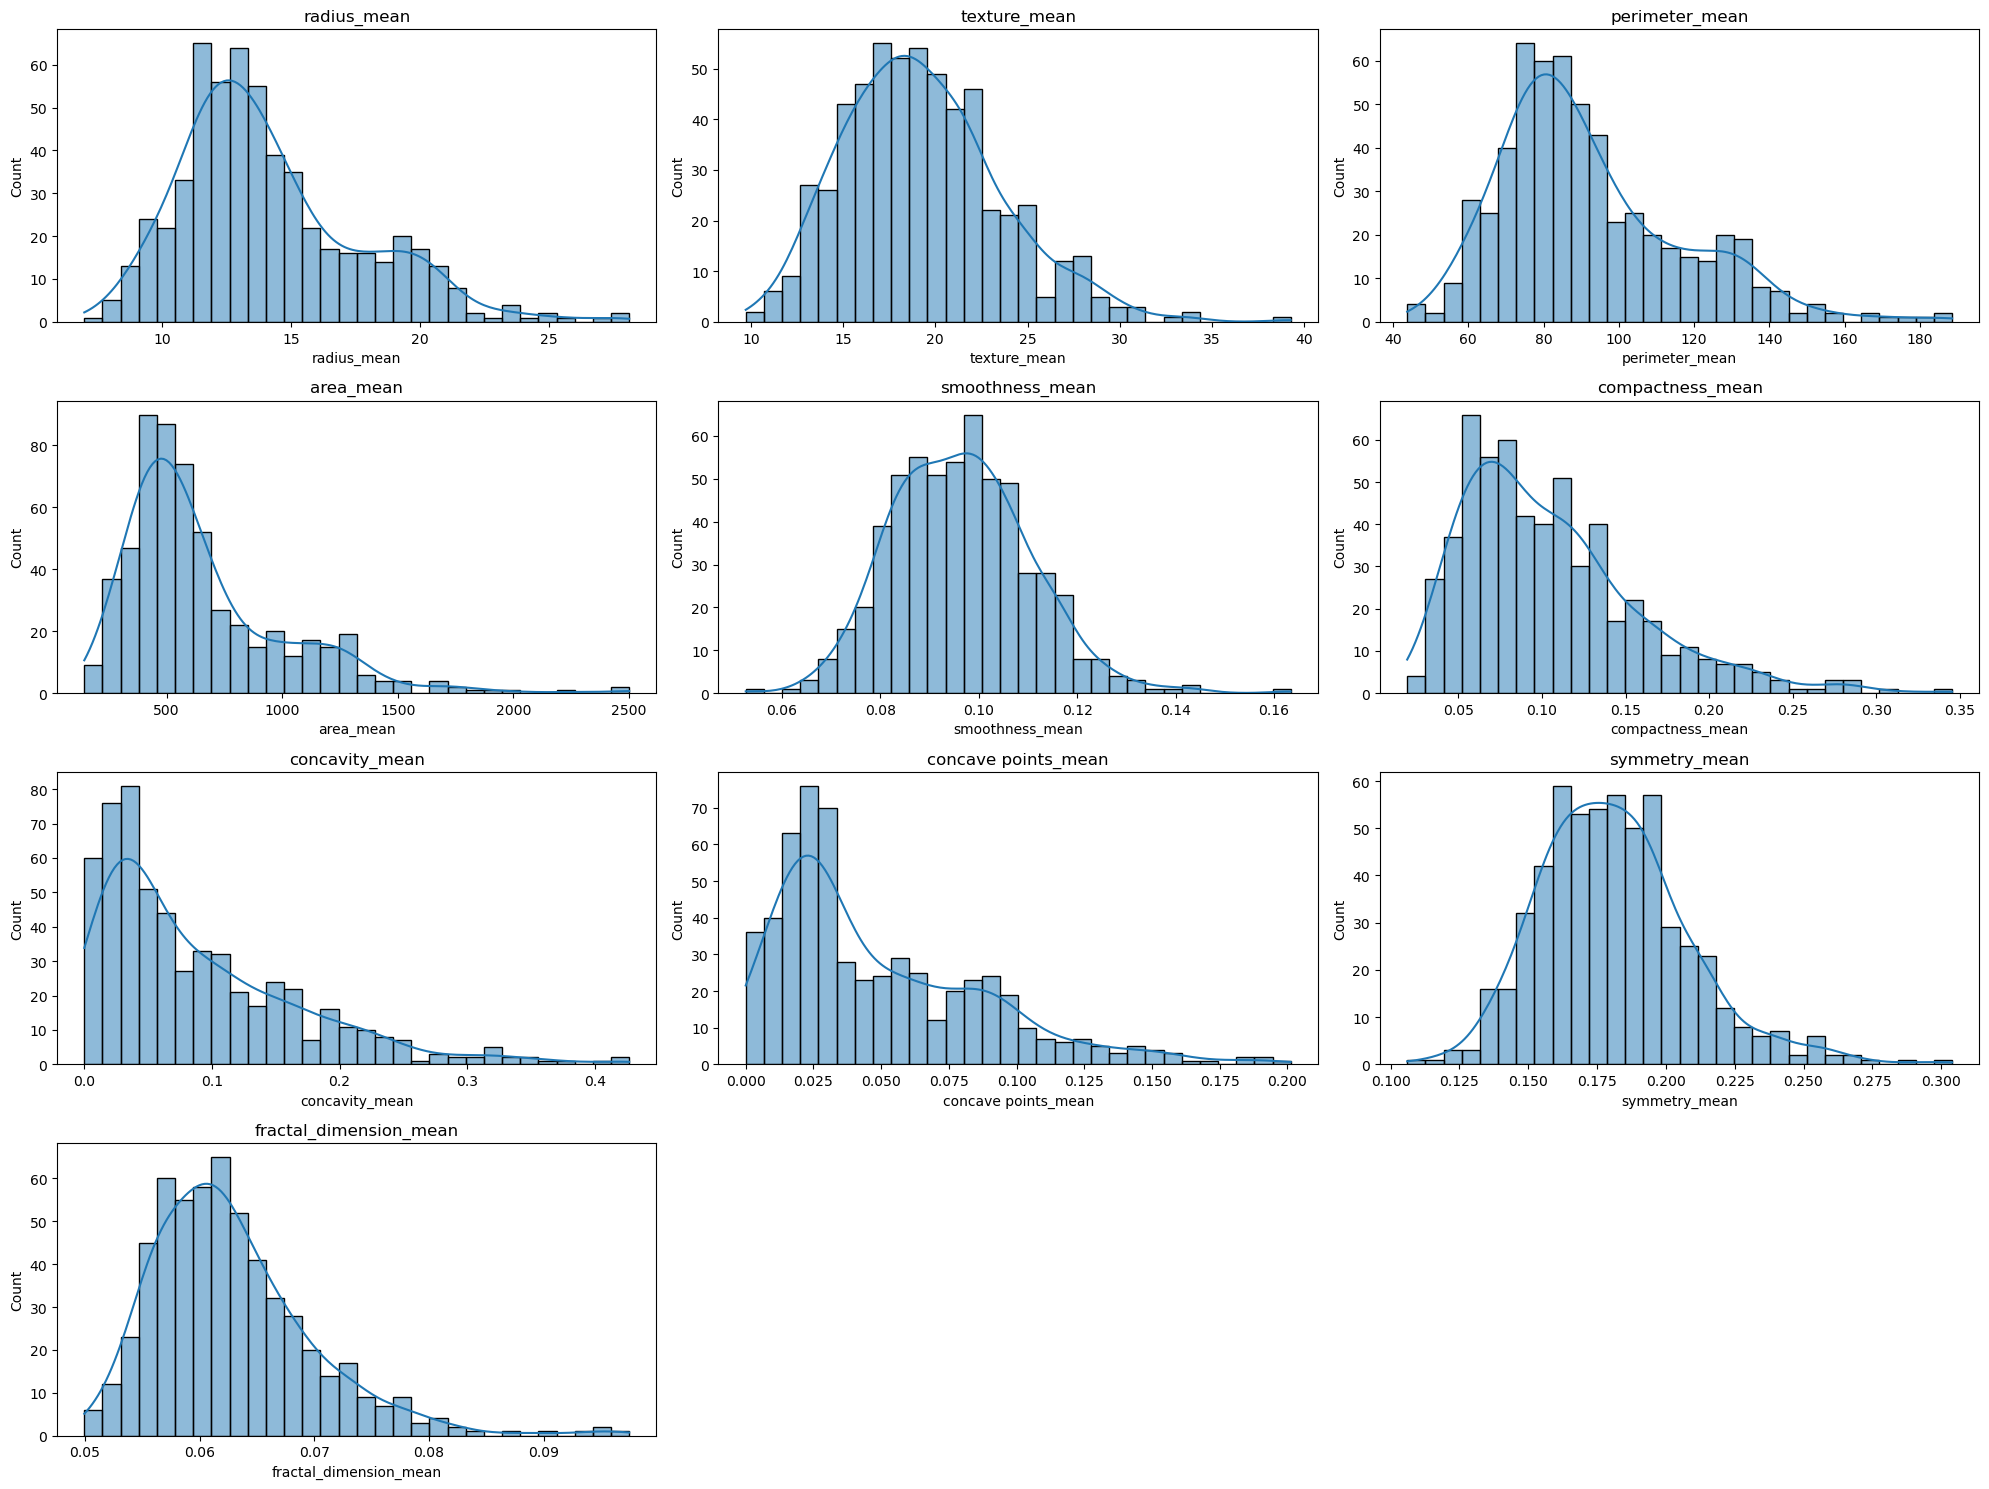

In [6]:
# Sayısal özelliklerin dağılımı
numeric_features = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(20,15))
for i, col in enumerate(numeric_features[:10]):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

#### <span style="color:#32cd32;">1.5. Korelasyon Analizi<span>

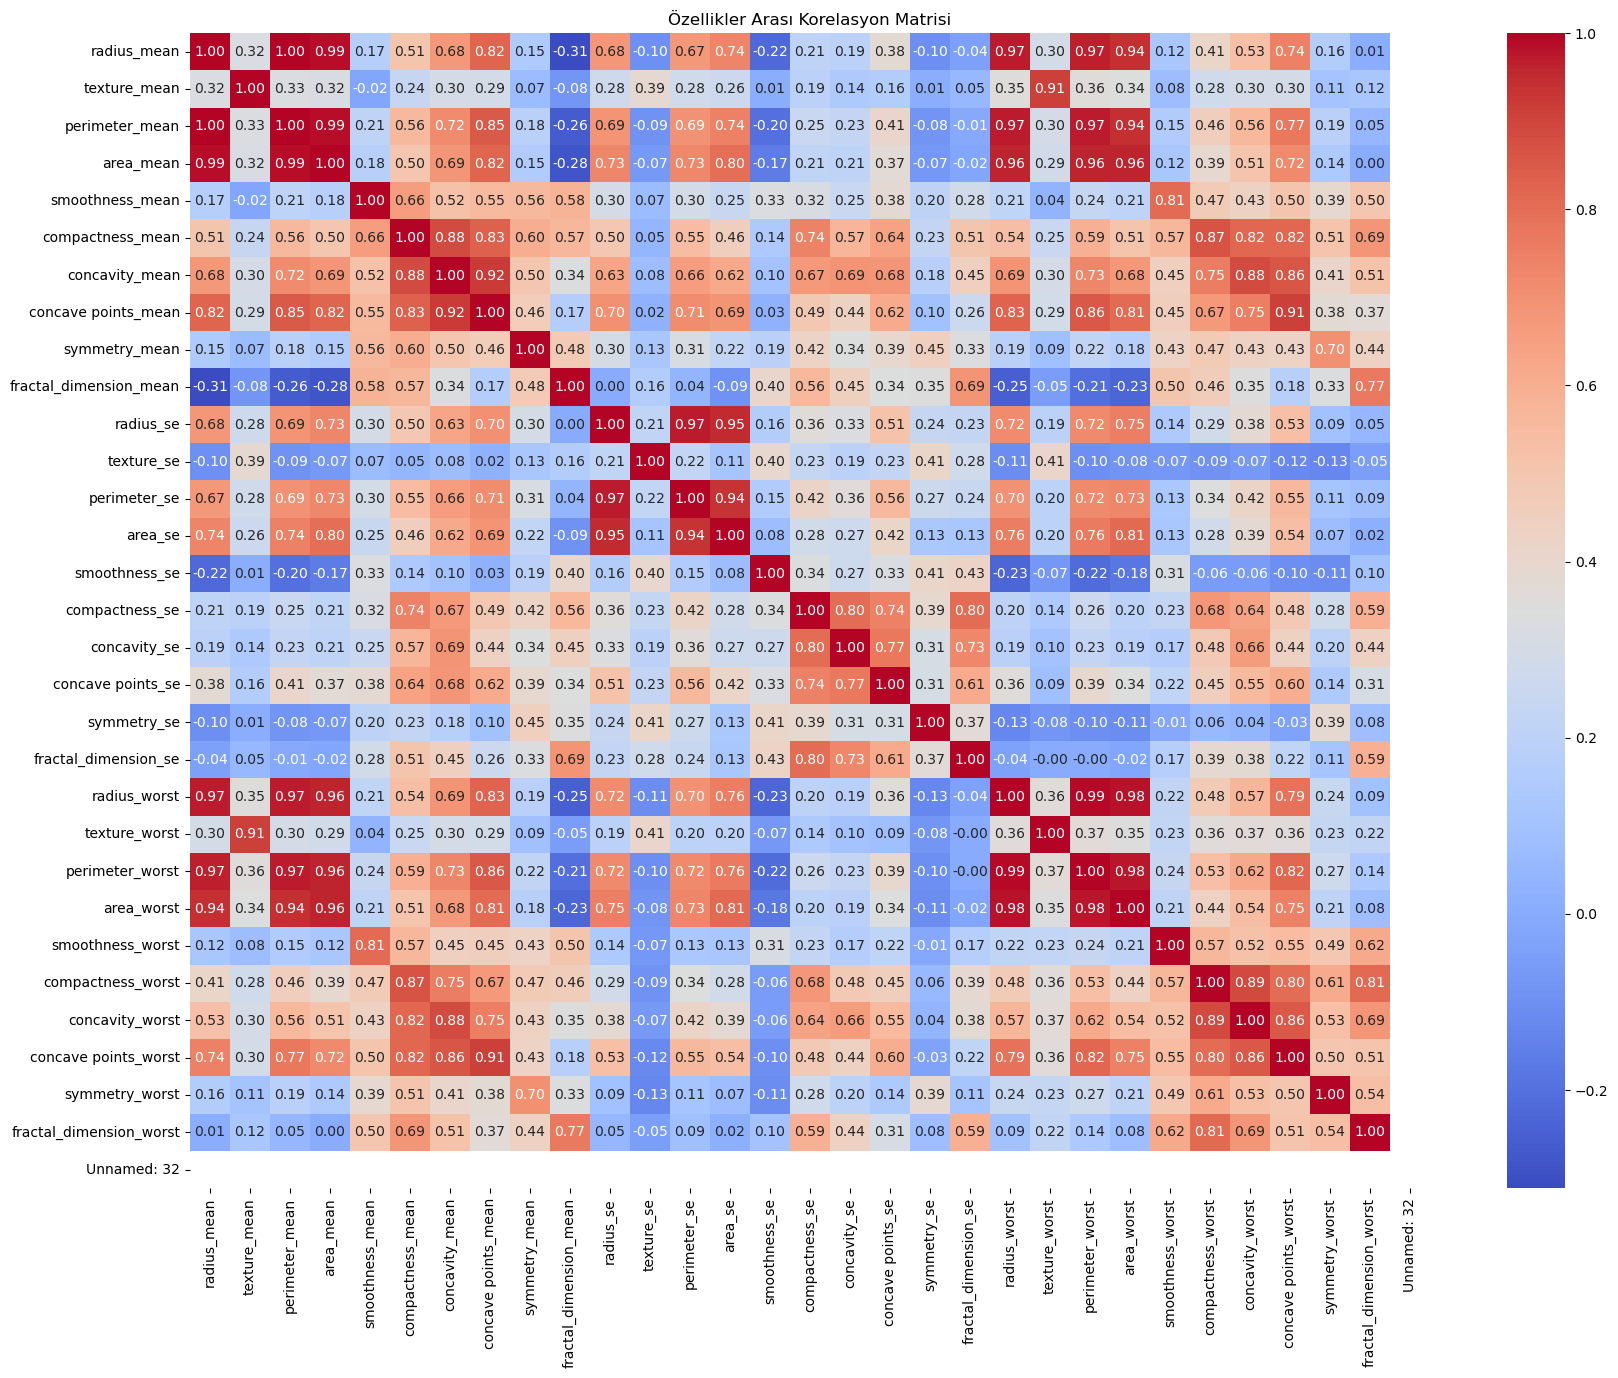

In [7]:
# Korelasyon matrisi
plt.figure(figsize=(20,15))
corr_matrix = df[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Özellikler Arası Korelasyon Matrisi')
plt.show()

In [8]:
# En yüksek korelasyonlu özellik çiftleri
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr != 1].drop_duplicates()
print("\nEn yüksek korelasyonlu özellik çiftleri:")
print(high_corr.head(10))


En yüksek korelasyonlu özellik çiftleri:
radius_mean      perimeter_mean     0.997855
perimeter_worst  radius_worst       0.993708
radius_mean      area_mean          0.987357
perimeter_mean   area_mean          0.986507
radius_worst     area_worst         0.984015
area_worst       perimeter_worst    0.977578
radius_se        perimeter_se       0.972794
perimeter_mean   perimeter_worst    0.970387
radius_mean      radius_worst       0.969539
perimeter_mean   radius_worst       0.969476
dtype: float64


### **<span style="color:#ff69b4;">2.VERİ ÖN İŞLEME</span>**  
Makine öğrenmesi modelleri, genellikle temiz, tutarlı ve belirli formatlardaki verilerle en iyi performansı gösterir. Bu aşama, ham veriyi modelin anlayabileceği ve daha verimli çalışabileceği bir hale getirmek için gereklidir. Eksik değerlerin, gereksiz sütunların yönetilmesi ve sayısal özelliklerin ölçeklenmesi, modelin genellenebilirliğini ve doğruluğunu artırır.

#### <span style="color:#32cd32;">2.1. Veri Normalizasyonu/Standartizasyonu<span>

In [9]:
print("NaN değerlerin toplamı:")
print(df.isnull().sum())

NaN değerlerin toplamı:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimensi

In [10]:
print("\nSonsuz değer kontrolü:")
print(np.isinf(df.select_dtypes(include=np.number)).sum())


Sonsuz değer kontrolü:
id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Unnamed: 32                0
dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler

# 'target' sütununu oluştur (diagnosis -> sayısal)
df['target'] = df['diagnosis'].map({'M': 0, 'B': 1})

# Gereksiz sütunları çıkar: 'id' ve boş sütun varsa (Unnamed: 32)
X = df.drop(['id', 'diagnosis', 'target', 'Unnamed: 32'], axis=1, errors='ignore')
y = df['target']

# Standardizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Yeni ölçeklenmiş DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


#### <span style="color:#32cd32;">2.2. Özellik Seçimi/Boyut Azaltma<span>

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

# En iyi 10 özelliği seçme
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Seçilen sütun adları
selected_features = X.columns[selector.get_support()]
print("Seçilen Özellikler:", list(selected_features))

Seçilen Özellikler: ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


#### <span style="color:#32cd32;">2.3. Veri Bölünmesi<span>

In [13]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y)

print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)

Eğitim seti boyutu: (455, 10)
Test seti boyutu: (114, 10)


### **<span style="color:#ff69b4;">3.MODEL GELİŞTİRME</span>**  
Bu aşamada, meme kanseri teşhisi sınıflandırma problemi için çeşitli geleneksel makine öğrenmesi algoritmaları ve derin öğrenme modelleri oluşturulur ve eğitilir. Farklı model türlerinin performansı karşılaştırılarak en uygun teşhis aracı belirlenmeye çalışılır.

#### <span style="color:#32cd32;">3.1. Geleneksel Makine Öğrenmesi Modelleri<span>

##### <span style="color:orange;">3.1.1. Lojistik Regresyon: <span> 
İkili sınıflandırma için temel istatistiksel model, kanserin iyi/kötü huylu olma olasılığını hesaplar. Böylece doğrusal bir sınıflandırma algoritması eğitildi.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model oluşturma ve eğitme
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Tahminler
y_pred = lr.predict(X_test)

# Performans metrikleri
print("Lojistik Regresyon Doğruluğu:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n\n", classification_report(y_test, y_pred))

Lojistik Regresyon Doğruluğu: 0.9473684210526315

Sınıflandırma Raporu:

               precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



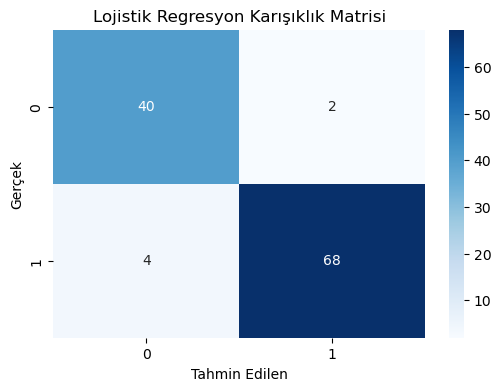

In [15]:
# Karışıklık matrisi
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Lojistik Regresyon Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

##### <span style="color:orange;">3.1.2. Random Forest: <span>
Çok sayıda karar ağacının oylamasıyla tahmin yapar, overfitting'e karşı dirençlidir. 

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Model oluşturma ve eğitme
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Tahminler
y_pred = rf.predict(X_test)

# Performans metrikleri
print("Random Forest Doğruluğu:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n\n", classification_report(y_test, y_pred))

Random Forest Doğruluğu: 0.956140350877193

Sınıflandırma Raporu:

               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



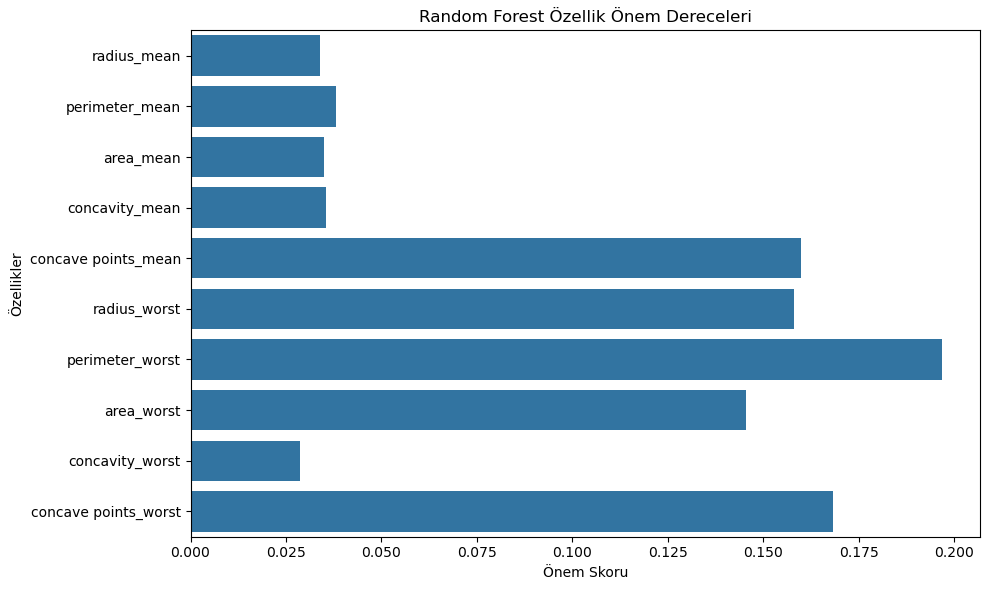

In [17]:
# Özellik önem dereceleri
plt.figure(figsize=(10,6))
sns.barplot(x=rf.feature_importances_, y=selected_features)
plt.title('Random Forest Özellik Önem Dereceleri')
plt.xlabel('Önem Skoru')
plt.ylabel('Özellikler')
plt.tight_layout()
plt.show()

##### <span style="color:orange;">3.1.3. SVM (Destek Vektör Makineleri): <span>
Veriyi en iyi ayıran sınırı bulur, özellikle yüksek boyutlu verilerde etkilidir.

In [18]:
from sklearn.svm import SVC

# Model oluşturma ve eğitme
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Tahminler
y_pred = svm.predict(X_test)

# Performans metrikleri
print("SVM Doğruluğu:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n\n", classification_report(y_test, y_pred))

SVM Doğruluğu: 0.956140350877193

Sınıflandırma Raporu:

               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



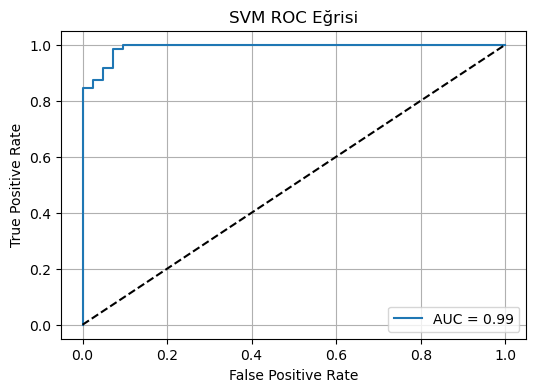

In [19]:
from sklearn.metrics import roc_curve, auc

y_prob = svm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('SVM ROC Eğrisi')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


##### <span style="color:orange;">3.1.4. K-Nearest Neighbors (KNN): <span>
Benzer hasta verilerine bakarak sınıflandırma yapar, basit ama etkilidir.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN Doğruluk:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n\n", classification_report(y_test, y_pred))

KNN Doğruluk: 0.956140350877193

Sınıflandırma Raporu:

               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



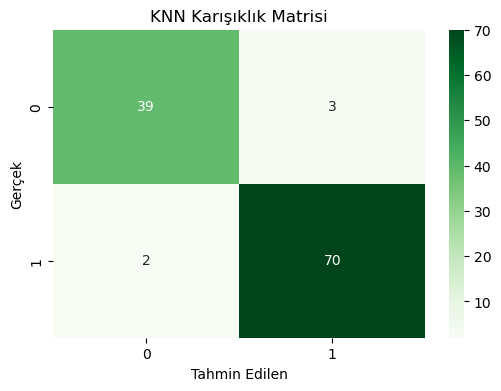

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), annot=True, fmt='d', cmap='Greens')
plt.title('KNN Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

##### <span style="color:orange;">3.1.5. Naive Bayes: <span>
Olasılık temelli hızlı bir algoritma, özelliklerin bağımsız olduğu varsayımıyla çalışır.

In [22]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Naive Bayes Doğruluk:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n\n", classification_report(y_test, y_pred))


Naive Bayes Doğruluk: 0.9298245614035088

Sınıflandırma Raporu:

               precision    recall  f1-score   support

           0       0.89      0.93      0.91        42
           1       0.96      0.93      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



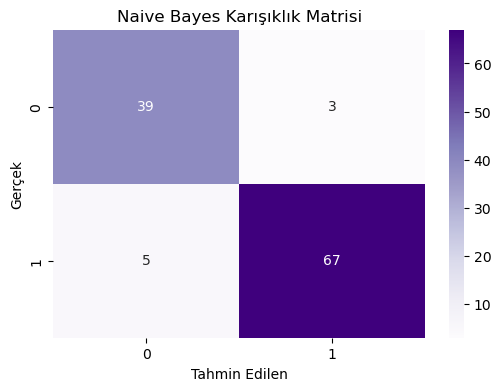

In [23]:
# Karışıklık Matrisi
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, nb.predict(X_test)), annot=True, fmt='d', cmap='Purples')
plt.title('Naive Bayes Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

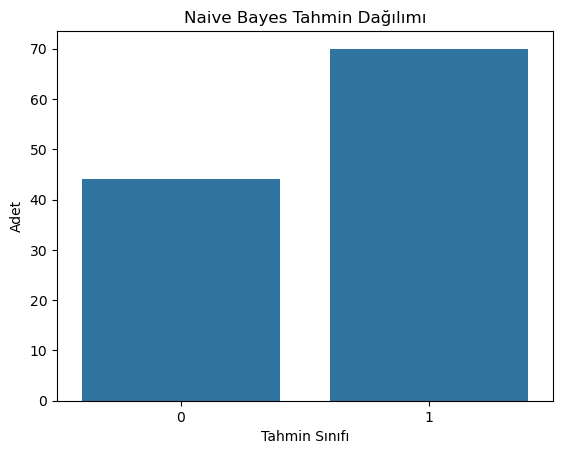

In [24]:
# Tahmin edilen sınıfların dağılımı
sns.countplot(x=nb.predict(X_test))
plt.title('Naive Bayes Tahmin Dağılımı')
plt.xlabel('Tahmin Sınıfı')
plt.ylabel('Adet')
plt.show()

##### <span style="color:orange;">3.1.6. Gradient Boosting (GBM): <span>
Zayıf modelleri artıkları minimize ederek birleştirir, sıralı öğrenme yapar. 

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

print("Gradient Boosting Doğruluk:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n\n", classification_report(y_test, y_pred))

Gradient Boosting Doğruluk: 0.956140350877193

Sınıflandırma Raporu:

               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



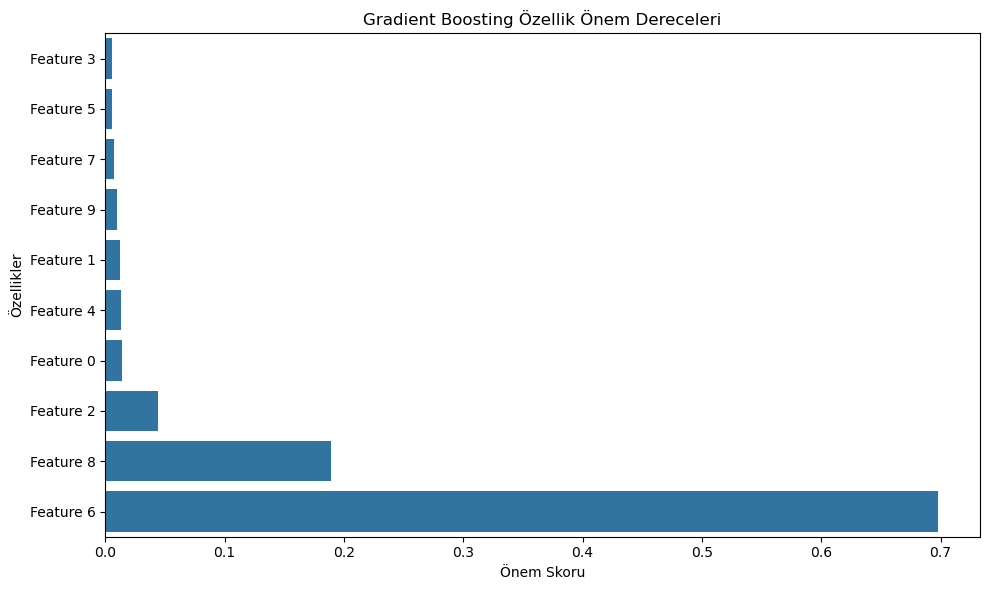

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Example data - replace with your actual data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
feature_names = [f'Feature {i}' for i in range(X.shape[1])]  # Replace with your actual feature names

# Create and train the model
model = GradientBoostingClassifier(random_state=42)
model.fit(X, y)

# Now you can plot feature importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance[sorted_idx], y=np.array(feature_names)[sorted_idx])
plt.title('Gradient Boosting Özellik Önem Dereceleri')
plt.xlabel('Önem Skoru')
plt.ylabel('Özellikler')
plt.tight_layout()
plt.show()

##### <span style="color:orange;">3.1.7. XGBoost: <span>
Gradient Boosting'in optimize hali, yüksek doğruluk için artıkları (residuals) ardışık düzeltir.

In [27]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("XGBoost Doğruluk:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n\n", classification_report(y_test, y_pred))

XGBoost Doğruluk: 0.9649122807017544

Sınıflandırma Raporu:

               precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



<Figure size 1000x600 with 0 Axes>

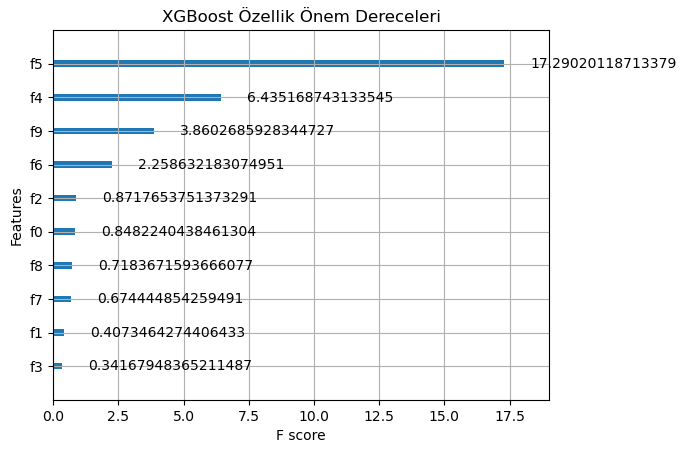

In [28]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# model eğitimi
model = XGBClassifier()
model.fit(X_train, y_train)

# Özellik önem grafiği
plt.figure(figsize=(10,6))
plot_importance(model.get_booster(), max_num_features=10, importance_type='gain')
plt.title('XGBoost Özellik Önem Dereceleri')
plt.show()

#### <span style="color:#32cd32;">3.2. Derin Öğrenme Modelleri<span>

##### <span style="color:orange;">3.2.1. Yapay Sinir Ağı: <span>  
Karmaşık örüntüleri yakalamak için katmanlı yapı kullanır. Birden fazla gizli katmanı olan temel bir derin öğrenme modeli oluşturuldu ve eğitildi.

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Model oluşturma
model = Sequential([
    Input(shape=(X_train.shape[1],), batch_size=32),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Modeli derle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'],
              jit_compile=True)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Eğitimi başlat
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 280ms/step - accuracy: 0.7139 - loss: 0.6010 - val_accuracy: 0.9035 - val_loss: 0.4175
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9216 - loss: 0.3922 - val_accuracy: 0.9123 - val_loss: 0.2939
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9281 - loss: 0.2801 - val_accuracy: 0.9123 - val_loss: 0.2149
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9499 - loss: 0.1905 - val_accuracy: 0.9123 - val_loss: 0.1734
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9286 - loss: 0.1988 - val_accuracy: 0.9123 - val_loss: 0.1549
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9430 - loss: 0.1807 - val_accuracy: 0.9123 - val_loss: 0.1453
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9390 - loss: 0.1590 - val_accuracy: 0.9123 - val_loss: 0.1422
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9531 - loss: 0.1491 - val_accuracy: 0

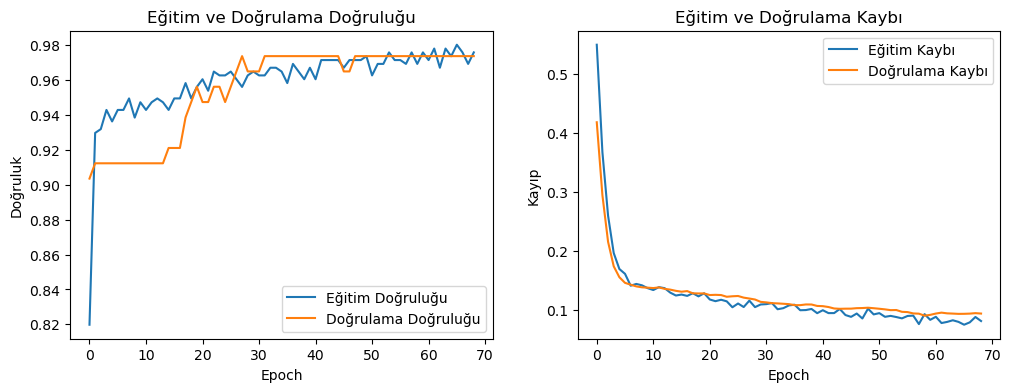

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 521ms/step

YSA Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [30]:
# Eğitim geçmişini görselleştirme
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

# Test setinde değerlendirme
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print("\nYSA Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

##### <span style="color:orange;">3.2.2. Evrişimli Sinir Ağları (CNN): <span>  
CNN, özellikle görüntü işleme için kullanılan ve veriden otomatik olarak öznitelikler çıkaran derin öğrenme modelidir.

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Veriyi yükle
df = pd.read_csv("data.csv")
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Özellikler ve hedef
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Normalizasyon
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# CNN için yeniden şekillendirme (6x5)
X_reshaped = X_scaled.reshape(-1, 6, 5, 1)

# Train-Test bölme
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42, stratify=y)

# Model
model = Sequential([
    Input(shape=(6, 5, 1)),
    Conv2D(32, (2, 2), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], jit_compile=True)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 217ms/step - accuracy: 0.5131 - loss: 0.6937 - val_accuracy: 0.6316 - val_loss: 0.6669
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7057 - loss: 0.6616 - val_accuracy: 0.6404 - val_loss: 0.6331
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7124 - loss: 0.6326 - val_accuracy: 0.7807 - val_loss: 0.5873
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7559 - loss: 0.5915 - val_accuracy: 0.8070 - val_loss: 0.5276
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8618 - loss: 0.5154 - val_accuracy: 0.8684 - val_loss: 0.4526
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8606 - loss: 0.4665 - val_accuracy: 0.8947 - val_loss: 0.3803
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8868 - loss: 0.3879 - val_accuracy: 0.9035 - val_loss: 0.3180
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8916 - loss: 0.3459 - val_accuracy: 0

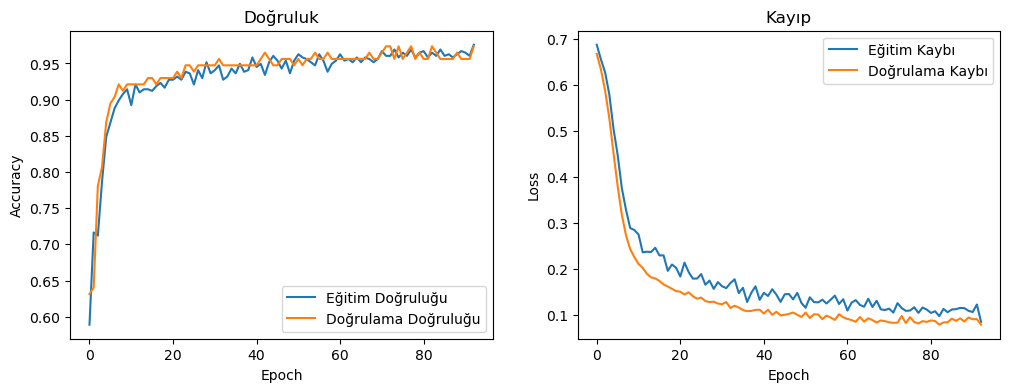

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step

CNN Sınıflandırma Raporu:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [32]:
# Görselleştirme
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tahmin ve değerlendirme
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print("\nCNN Sınıflandırma Raporu:\n\n", classification_report(y_test, y_pred))


##### <span style="color:orange;">3.2.3. Autoencoder: <span>  
Autoencoder, veriyi sıkıştırarak kendini yeniden üretmeye çalışan ve genellikle boyut indirgeme ya da anomali tespiti için kullanılan yapay sinir ağıdır.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Uyarıları kapat (opsiyonel)
import warnings
warnings.filterwarnings('ignore')

# Veri setini yükle
df = pd.read_csv("data.csv")

# Gereksiz sütunları kaldır
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # M = 1, B = 0

# Sadece özellikleri kullan
X = df.drop('diagnosis', axis=1)

# Veriyi normalize et
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test verisine ayır
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Autoencoder mimarisi
input_dim = X_train.shape[1]  # 30
encoding_dim = 14  # gizli katman boyutu

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse', jit_compile=True)

# Erken durdurma
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğit
history = autoencoder.fit(X_train, X_train,
                          validation_data=(X_test, X_test),
                          epochs=100,
                          batch_size=32,
                          callbacks=[early_stop],
                          verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0991 - val_loss: 0.0930
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0942 - val_loss: 0.0870
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0858 - val_loss: 0.0788
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0787 - val_loss: 0.0693
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0669 - val_loss: 0.0594
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0590 - val_loss: 0.0504
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - val_loss: 0.0435
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0435 - val_loss: 0.0383
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0377 - val_loss: 0.0346
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0355 - val_loss: 0.0320
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0333 - val_loss: 0.0298
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

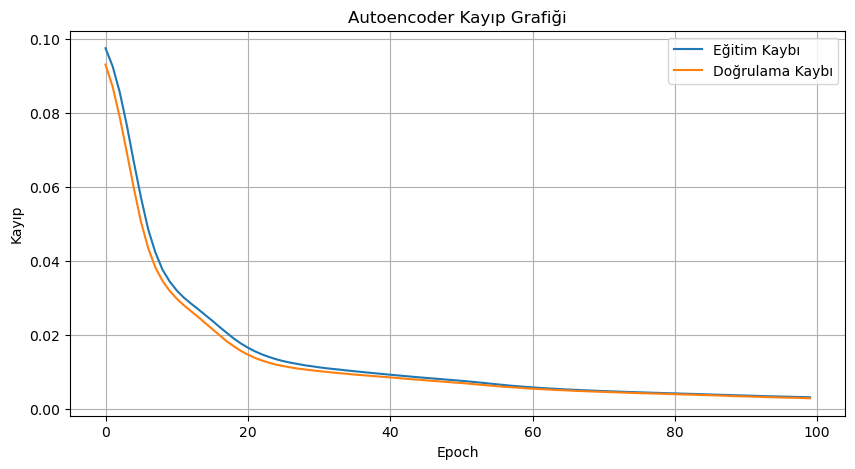

In [34]:
# Eğitim kaybı grafiği
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title("Autoencoder Kayıp Grafiği")
plt.xlabel("Epoch")
plt.ylabel("Kayıp")
plt.legend()
plt.grid(True)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

İlk 5 Rekonstrüksiyon Hatası: [0.00031105 0.00176961 0.00225758 0.00214933 0.00180798]


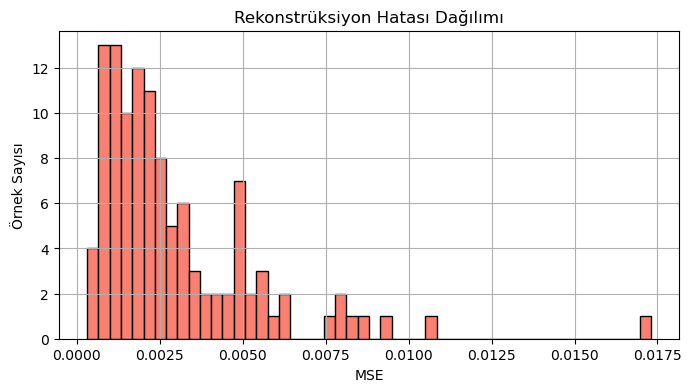

In [35]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

# Test verisi üzerinden rekonstrüksiyon hatası hesapla
reconstructed = autoencoder.predict(X_test)
mse = np.mean(np.square(X_test - reconstructed), axis=1)

# İlk 5 hata örneği
print("\nİlk 5 Rekonstrüksiyon Hatası:", mse[:5])

# Tüm hata dağılımı (opsiyonel)
plt.figure(figsize=(8,4))
plt.hist(mse, bins=50, color='salmon', edgecolor='black')
plt.title("Rekonstrüksiyon Hatası Dağılımı")
plt.xlabel("MSE")
plt.ylabel("Örnek Sayısı")
plt.grid(True)
plt.show()

### **<span style="color:#ff69b4;">4.MODEL ANALİZİ VE KARŞILAŞTIRMA</span>**  
Modellerin sadece eğitim aşamasında değil, yeni veriler üzerindeki gerçek dünya performansını değerlendirmek ve karşılaştırmak için bu aşama önemlidir. Hangi modelin en doğru, en hızlı veya en açıklanabilir olduğunu belirlemek, en iyi teşhis sistemini seçmeye yardımcı olur.

#### <span style="color:#32cd32;">4.1. Model Performans Karşılaştırması<span>

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


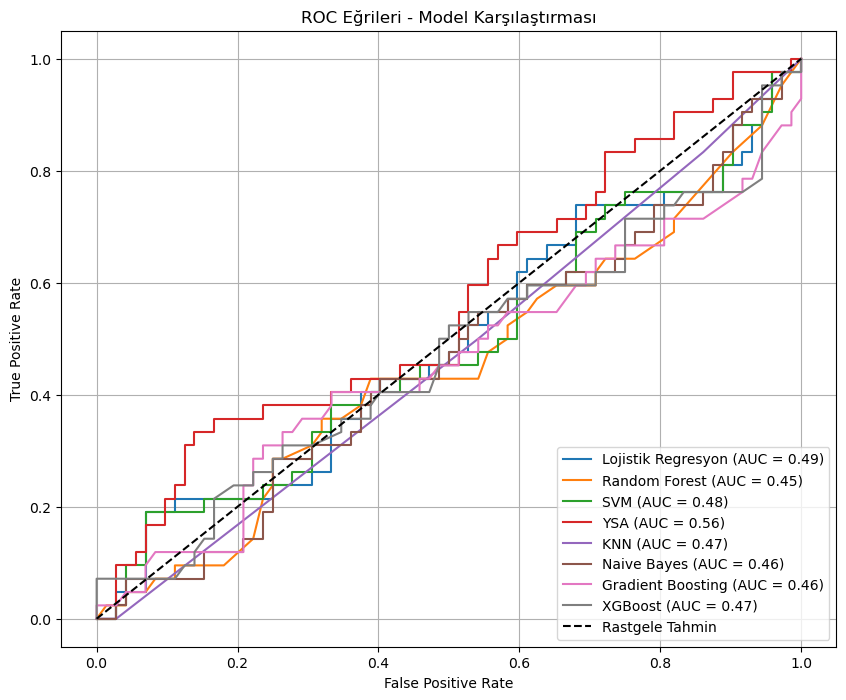

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))

# 10 özellik ile eğitilmiş modeller için
X_test_10 = X_test[:, :10]

# 30 özellik ile eğitilmiş modeller için (CNN / YSA modeline uygun şekilde reshape edilecek)
X_test_30 = X_test[:, :30]
num_samples = X_test_30.shape[0]
X_test_reshaped = X_test_30.reshape((num_samples, 6, 5, 1))  # Modelin beklediği input shape

# Lojistik Regresyon (10 özellik)
y_prob = lr.predict_proba(X_test_10)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Lojistik Regresyon (AUC = {roc_auc:.2f})')

# Random Forest (10 özellik)
y_prob = rf.predict_proba(X_test_10)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

# SVM (10 özellik)
y_prob = svm.predict_proba(X_test_10)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')

# YSA / CNN (30 özellik, 4D input)
y_prob = model.predict(X_test_reshaped)
if y_prob.ndim > 1:
    y_prob = y_prob.ravel()
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'YSA (AUC = {roc_auc:.2f})')

# KNN (10 özellik)
y_prob = knn.predict_proba(X_test_10)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')

# Naive Bayes (10 özellik)
y_prob = nb.predict_proba(X_test_10)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.2f})')

# Gradient Boosting (30 özellik)
y_prob = gb.predict_proba(X_test_10)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc:.2f})')

# XGBoost (30 özellik)
y_prob = xgb.predict_proba(X_test_10)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Rastgele Tahmin')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrileri - Model Karşılaştırması')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### <span style="color:#32cd32;">4.2. Cross Validation ile Model Değerlendirme<span>

In [37]:
print("X_selected shape:", X_selected.shape)
print("y shape:", y.shape if hasattr(y, 'shape') else len(y))

X_selected shape: (569, 10)
y shape: (569,)


In [38]:
import pandas as pd
y = pd.Series(y)  # NumPy array -> Pandas Series
y = y.iloc[:569] 

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_selected = imputer.fit_transform(X_selected)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import clone
import numpy as np


# Keras modelini yeniden oluşturan fonksiyon
def create_nn_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

from sklearn.base import clone

models = [
    ('Logistic Regression', LogisticRegression(max_iter=5000, random_state=42)),
    ('SVM', SVC(kernel='rbf', probability=True, random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', XGBClassifier(eval_metric='logloss', random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('YSA', 'keras')  # Placeholder, özel işlem yapılacak
]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
names = []

print("5-Katlı Cross-Validation Sonuçları (Elle Hesaplanan):\n")

for name, model in models:
    scores = []
    for train_idx, test_idx in skf.split(X_selected, y):
        X_train, X_test = X_selected[train_idx], X_selected[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        if name != 'YSA':
            cloned_model = clone(model)
            cloned_model.fit(X_train, y_train)
            y_pred = cloned_model.predict(X_test)
        else:
            # YSA modeli her fold için yeniden oluşturulmalı
            nn_model = create_nn_model(X_selected.shape[1])
            nn_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)
            y_pred_prob = nn_model.predict(X_test)
            y_pred = (y_pred_prob > 0.5).astype(int).ravel()

        acc = accuracy_score(y_test, y_pred)
        scores.append(acc)

    results.append(scores)
    names.append(name)
    print(f"{name}: Ortalama Doğruluk = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")

5-Katlı Cross-Validation Sonuçları (Elle Hesaplanan):

Logistic Regression: Ortalama Doğruluk = 0.9508, Std = 0.0162
SVM: Ortalama Doğruluk = 0.9420, Std = 0.0252
Random Forest: Ortalama Doğruluk = 0.9456, Std = 0.0231
KNN: Ortalama Doğruluk = 0.9420, Std = 0.0162
Naive Bayes: Ortalama Doğruluk = 0.9421, Std = 0.0225
XGBoost: Ortalama Doğruluk = 0.9403, Std = 0.0139
Gradient Boosting: Ortalama Doğruluk = 0.9367, Std = 0.0238
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
YSA: Ortalama Doğruluk = 0.9508, Std = 0.0180


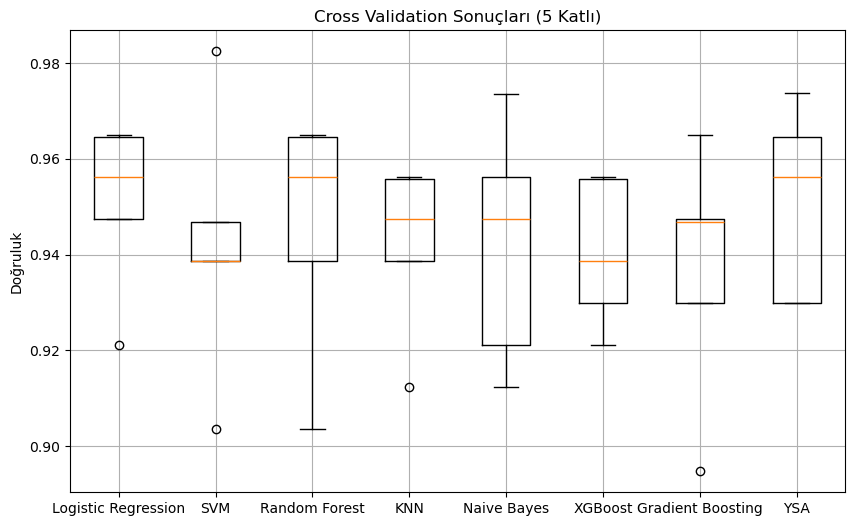

In [42]:
# Boxplot ile görselleştirme
plt.figure(figsize=(10, 6))
plt.boxplot(results, tick_labels=names)
plt.title('Cross Validation Sonuçları (5 Katlı)')
plt.ylabel('Doğruluk')
plt.grid(True)
plt.show()

### **<span style="color:#ff69b4;">5. STREAMLİT ENTEGRESYONU</span>**

#### <span style="color:#32cd32;">5.1. Temel Streamlit Uygulaması<span>

<span style="color:blue;">Öncelikle Streamlit Nedir?<span>  

Streamlit, veri bilimcileri ve geliştiriciler için hızlı ve etkileşimli web uygulamaları oluşturmayı kolaylaştıran bir Python kütüphanesidir. Streamlit, veri analizi, görselleştirme ve model sonuçlarını paylaşmak isteyen kişilere, kullanıcı dostu bir arayüz üzerinden etkileşimli deneyimler sunma imkanı sağlar. Streamlit kullanmanın bazı avantajları şunlardır:
- Kolay Kullanım: Streamlit, kullanımı basit ve anlaşılır bir API'ye sahiptir. Python bilen bir kişi, hızlıca bir web uygulaması oluşturabilir.
- Hızlı Prototip Oluşturma: Streamlit, hızlı prototip oluşturmayı destekler. Veri bilimcileri veya geliştiriciler, fikirlerini hızla test etmek ve görselleştirmek için Streamlit'i kullanabilirler.

Makine öğrenmesi modelleri ve veri analiz sonuçları, eğer kullanıcılar tarafından kolayca erişilemez ve etkileşimli bir şekilde kullanılamazsa değerlerini kaybedebilir. Streamlit, bu analitik çözümleri teknik olmayan kullanıcıların bile kolayca kullanabileceği interaktif bir web uygulamasına dönüştürmeyi sağlar. Bu, doktorların veya sağlık profesyonellerinin hasta verilerini girip anında teşhis tahmini alabilecekleri ve ilgili veri analizlerini görebilecekleri bir arayüz sunmayı hedefler.

Bu kısmı python dosyasında (streamlit_app.py) yaptım. Ve sizinle göndermiş olduğum dosyamda paylaştım.  

- Kullanıcı dostu hasta veri giriş arayüzü (slider'lar)
- Model seçim dropdown'ı
- Gerçek zamanlı tahmin görüntüleme
- Etkileşimli veri görselleştirmeleri
- Model performans karşılaştırma panosu
- Sistem Bilgileri

sayesinde net ve anlaşılır bir uygulama gerçekleştirdim.

#### <span style="color:#32cd32;">5.2. GitHub<span>  
Projemin son hali GitHub'da da mevcuttur. 
GitHub Reposu: [https://github.com/ipekZorpineci2003/Yapay_Zeka_Analizi](https://github.com/ipekZorpineci2003/Yapay_Zeka_Analizi)